# Chi-Squared Goodness-Of-Fit Test

**The chi-squared goodness-of-fit test is an analog of the one-way t-test for categorical variables: it tests whether the distribution of sample categorical data matches an expected distribution.**

**For example, you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire U.S. population or whether the computer browser preferences of your friends match those of Internet uses as a whole.**

**When working with categorical data the values the observations themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning.**

**Tests dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.**

## Generating some fake demographic data for U.S. and Minnesota and performing a Chi-Square test to check whether they are different :

In [1]:
# Import related libraies.

import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
a = ["white"]*3
a

['white', 'white', 'white']

In [3]:
type(a)

list

In [4]:
b = ["white"]*3 + ["hispanic"]*4
b

['white', 'white', 'white', 'hispanic', 'hispanic', 'hispanic', 'hispanic']

In [5]:
c = pd.DataFrame(b)
c

,0
0,white
1,white
2,white
3,hispanic
4,hispanic
5,hispanic
6,hispanic


In [6]:
c[0]

0       white
1       white
2       white
3    hispanic
4    hispanic
5    hispanic
6    hispanic
Name: 0, dtype: object

In [7]:
c_table = pd.crosstab(index=c[0], columns="count")
c_table

col_0,count
0,
hispanic,4
white,3


In [8]:
print(c_table)

col_0     count
0              
hispanic      4
white         3


In [9]:
# Fake demographic data

national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)

# Fake sample data

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


In [10]:
national

,0
0,white
1,white
2,white
3,white
4,white
...,...
259995,other
259996,other
259997,other
259998,other


In [11]:
national.value_counts()

white       100000
hispanic     60000
black        50000
other        35000
asian        15000
dtype: int64

In [12]:
minnesota

,0
0,white
1,white
2,white
3,white
4,white
...,...
1370,other
1371,other
1372,other
1373,other


In [13]:
minnesota.value_counts()

white       600
hispanic    300
black       250
other       150
asian        75
dtype: int64

**Chi-squared tests are based on the so-called chi-squared statistic. You calculate the chi-squared statistic with the following formula :**

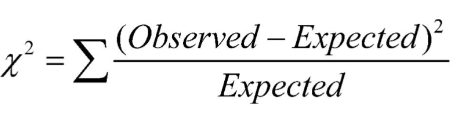

**In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the population for the corresponding category.**

## Calculation of chi-square test for our data to illustrate

In [14]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


In [15]:
national_table

col_0,count
0,
asian,15000
black,50000
hispanic,60000
other,35000
white,100000


In [16]:
national_ratios

col_0,count
0,
asian,0.057692
black,0.192308
hispanic,0.230769
other,0.134615
white,0.384615


In [17]:
expected

col_0,count
0,
asian,79.326923
black,264.423077
hispanic,317.307692
other,185.096154
white,528.846154


**Note: The chi-squared test assumes none of the expected counts are less than 5.**

**In the chi-square test we compare the chi-square test statistic to a critical value based on the chi-square distribution.**

**The scipy library shorthand for the chi-square distribution is chi2. Let's use this knowledge to find the critical value for 95% confidence level and check the p-value of our result :**

In [18]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

Critical value
9.487729036781154
P value
[0.00113047]


**Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.**

**You can carry out a chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare() :**

In [19]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

# Chi-Squared Test of Independence 

**Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another.**

**For instance, the month you were born probably doesn't tell you anything about which web browser you use, so we'd expect birth month and browser preference to be independent.**

**On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.**

**The chi-squared test of independence tests whether two categorical variables are independent. The test of independence is commonly used to determine whether variables like education, political views and other preferences vary based on demographic factors like gender, race and religion.**

## Generating some fake voter polling data and performing a test of independence :

In [20]:
np.random.seed(10)
aa = np.random.choice(a= ["asian","black"],
                              p = [0.65, 0.35],
                              size=10)
aa

array(['black', 'asian', 'asian', 'black', 'asian', 'asian', 'asian',
       'black', 'asian', 'asian'], dtype='<U5')

In [21]:
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["asian","black","hispanic","other","white"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"race":voter_race,
                       "party":voter_party})

voter_tab = pd.crosstab(voters.race, voters.party, margins = True)

voter_tab.columns = ["democrat","independent","republican","row_totals"]

voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]

observed = voter_tab.iloc[0:5,0:3]   # Get table without totals for later use
voter_tab

,democrat,independent,republican,row_totals
asian,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
col_totals,397,186,417,1000


In [22]:
observed

,democrat,independent,republican
asian,21,7,32
black,65,25,64
hispanic,107,50,94
other,15,8,15
white,189,96,212


In [23]:
voters

,race,party
0,white,democrat
1,asian,republican
2,white,independent
3,white,republican
4,other,democrat
...,...,...
995,white,republican
996,hispanic,independent
997,black,independent
998,white,republican


**For a test of independence, we use the same chi-squared formula that we used for the goodness-of-fit test. The main difference is we have to calculate the expected counts of each cell in a 2-dimensional table instead of a 1-dimensional table.**

**To get the expected count for a cell, multiply the row total for that cell by the column total for that cell and then divide by the total number of observations.**

**We can quickly get the expected counts for all cells in the table by taking the row totals and column totals of the table, performing an outer product on them with the np.outer() function and dividing by the number of observations :**

In [24]:
expected =  np.outer(voter_tab["row_totals"][0:5],
                     voter_tab.loc["col_totals"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["democrat","independent","republican"]
expected.index = ["asian","black","hispanic","other","white"]

expected

,democrat,independent,republican
asian,23.820,11.160,25.020
black,61.138,28.644,64.218
hispanic,99.647,46.686,104.667
other,15.086,7.068,15.846
white,197.309,92.442,207.249


**Now we can follow the same steps we took before to calculate the chi-square statistic, the critical value and the p-value :**

In [25]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

7.169321280162059


**Note : We call .sum() twice : once to get the column sums and a second time to add the column sums together, returning the sum of the entire 2D table.**

In [26]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # Note

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

Critical value
15.50731305586545
P value
0.518479392948842


**Note : The degrees of freedom for a test of independence equals the product of the number of categories in each variable minus 1. In this case we have a 5x3 table so df = 4x2 = 8.**

**As with the goodness-of-fit test, we can use scipy to conduct a test of independence quickly. Use stats.chi2_contingency() function to conduct a test of independence automatically given a frequency table of observed counts :**

In [27]:
stats.chi2_contingency(observed= observed)

(7.169321280162059,
 0.518479392948842,
 8,
 array([[ 23.82 ,  11.16 ,  25.02 ],
        [ 61.138,  28.644,  64.218],
        [ 99.647,  46.686, 104.667],
        [ 15.086,   7.068,  15.846],
        [197.309,  92.442, 207.249]]))

**The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.**

**As expected, given the high p-value, the test result does not detect a significant relationship between the variables.**

# Wrap Up

**Chi-squared tests provide a way to investigate differences in the distributions of categorical variables with the same categories and the dependence between categorical variables.**

<div class="alert alert-danger"><font color=black><u><b>Important Note :</u><b> In order to better understand the chi-square test, the article in the link below was used in the group study. All code blocks and explanations in the group study are taken from this article. 

**https://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html**